In [19]:
import os
import pandas as pd
import numpy as np
import sys
from pathlib import Path
notebook_path = Path().resolve()
supp_dir = notebook_path.parent
sys.path.append(str(supp_dir))
from Step03_Denosing.Wiener_Denosing import WienerDenoising
from config import WINDOW_DIR, RESULTS_DIR

In [11]:
participant_id = 'P03'
file_path = os.path.join(WINDOW_DIR, f"{participant_id}_processed_GD.csv")

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded data for participant: {participant_id}")
else:
    print(f"File not found: {file_path}")


Loaded data for participant: P03


In [12]:
df.head()

,participant,session,windowNumber,startTime,endTime,polarHR,galaxyPPG,galaxyACC,e4BVP,e4ACC,polarECG,polarACC,isPadded,gdHR,gdIBI,gdSDNN,gdRMSSD,gdPeaks
0,P03,adaptation,1,1710826380494,1710826388494,75.625,1904019.0;1899979.411009396;1897612.8152814284...,1.4058979749679563;9.690397262573242;-1.791501...,20.09;19.56;18.94;18.32;17.8;17.47;17.41;17.63...,-61.0;-19.0;4.0;-60.50098052948592;-19.0;4.0;-...,4;7;9;24;38;31;9;2;14;36;52;33;2;7;12;4;14;26;...,-825;227;499;-818;224;504;-819;223;499;-820;22...,False,70.623742,849.572650,36.307185,23.864757,29;133;237;344;455;571;687;802;912;1023
1,P03,adaptation,2,1710826382494,1710826390494,74.750,1905178.0;1906209.7866461223;1907698.937085712...,1.415478229522705;9.726323127746582;-1.8010822...,9.49;7.08;4.69;2.43;0.4;-1.38;-2.93;-4.31;-5.6...,-46.0;8.0;36.0;-46.998038941028156;9.497058411...,137;139;156;173;165;163;153;134;122;96;60;36;2...,-797;221;515;-796;223;517;-791;224;523;-798;22...,False,69.026549,869.230769,18.388132,21.365079,83;194;310;426;541;651;762;874;987
2,P03,adaptation,3,1710826384494,1710826392494,73.875,1953182.0;1955157.9362010402;1957178.959894189...,1.4442188739776611;9.81733512878418;-1.3292561...,-24.65;-24.35;-23.69;-22.86;-21.96;-20.84;-19....,-35.0;12.0;55.0;-32.50490264742961;11.50098052...,9;2;21;26;7;-12;-2;19;21;16;21;33;31;26;33;38;...,-793;225;518;-794;224;515;-796;225;515;-795;22...,False,69.333333,865.384615,15.924590,16.187824,50;166;281;391;502;614;727;839;950
3,P03,adaptation,4,1710826386494,1710826394494,73.000,1993428.0;1990761.4732771383;1988854.223052056...,1.353206753730774;9.826915740966797;-1.1017258...,-170.75;-191.03;-205.04;-211.88;-211.37;-204.2...,-61.0;18.0;-2.0;-61.0;18.0;-2.0;-61.0;18.0;-2....,55;64;79;76;60;48;64;76;48;26;45;52;40;50;64;5...,-812;190;506;-811;190;505;-809;185;505;-812;18...,False,69.781312,859.829060,9.245003,8.600261,20;130;241;353;466;578;689;800;912;1026
4,P03,adaptation,5,1710826388494,1710826396494,72.125,1995643.0;1995355.4529019003;1995095.622695549...,1.4035029411315918;9.860445976257324;-1.199923...,53.06;52.4;51.12;49.36;47.32;45.17;43.02;40.85...,-61.0;18.0;3.0;-61.0;17.500980529485922;3.4990...,108;117;117;137;153;153;153;165;182;180;158;14...,-782;203;534;-778;202;540;-777;202;543;-777;20...,False,70.428894,851.923077,23.886885,21.950532,93;206;318;429;540;652;766;875;979


In [13]:
wiener = WienerDenoising()

In [14]:
sample_index = 191
ppg = - np.array([float(x) for x in df.loc[sample_index, 'galaxyPPG'].split(';')])
acc_x = np.array([float(x) for x in df.loc[sample_index, 'galaxyACC'].split(';')[::3]])
acc_y = np.array([float(x) for x in df.loc[sample_index, 'galaxyACC'].split(';')[1::3]])
acc_z = np.array([float(x) for x in df.loc[sample_index, 'galaxyACC'].split(';')[2::3]])

print(f"Sample PPG length: {len(ppg)}")
print(f"Sample Accelerometer length: {len(acc_x)}")


Sample PPG length: 200
Sample Accelerometer length: 200


In [16]:
denoised_signal, heart_rate = wiener.process_galaxy(ppg, acc_x, acc_y, acc_z)
print(denoised_signal)


[-0.02515878 -0.02853145 -0.02923455 -0.02654341 -0.02014145 -0.01042546
  0.00136021  0.01326998  0.02309063  0.02894663  0.02987269  0.02613477
  0.01915715  0.01105419  0.00391876 -0.00087791 -0.00311273 -0.00369714
 -0.00422098 -0.00622296 -0.0104663  -0.01650376 -0.02271239 -0.02680407
 -0.02663903 -0.02105207 -0.01038991  0.0034441   0.01746989  0.02848425
  0.03400717  0.03300775  0.02617197  0.01562974  0.00424066 -0.00531664
 -0.01134401 -0.01354785 -0.01295491 -0.01136489 -0.01054715 -0.01147993
 -0.01391778 -0.01645652 -0.01708426 -0.01402376 -0.00655266  0.00451868
  0.01691852  0.02754376  0.03344686  0.03283267  0.02569878  0.01387226
  0.00041493 -0.01139369 -0.01912323 -0.02191369 -0.02058737 -0.01712426
 -0.01372428 -0.0118427  -0.01159351 -0.0117639  -0.01043034 -0.00591702
  0.00230868  0.01318771  0.02427266  0.0325214   0.03537663  0.03170699
  0.02223783  0.0093035  -0.00397666 -0.01476916 -0.02142396 -0.02385938
 -0.0233104  -0.02157857 -0.0201197  -0.01936226 -0

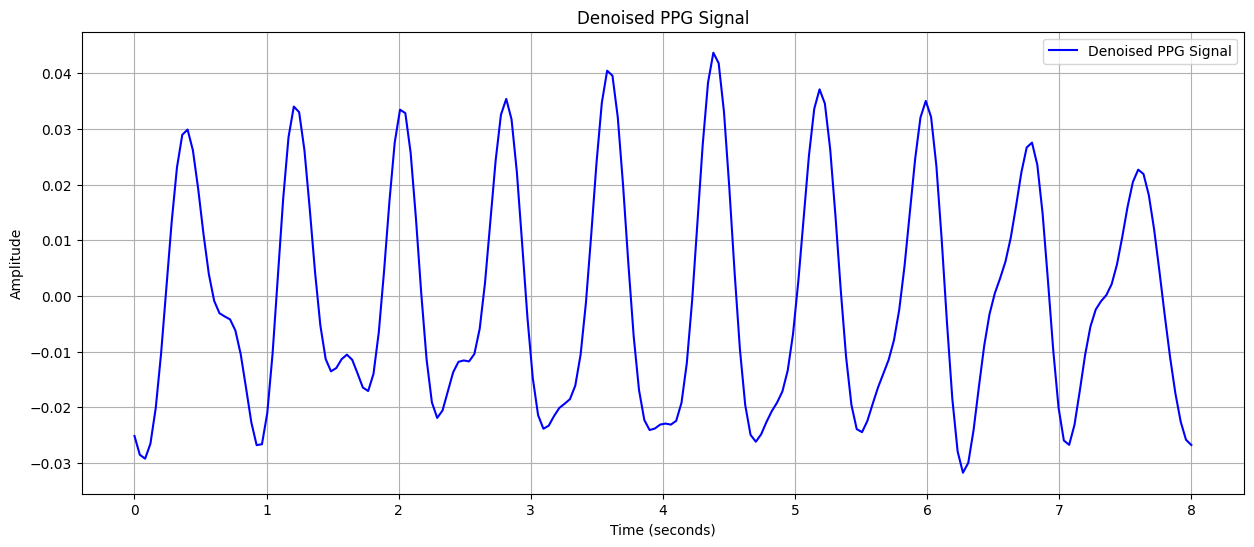

In [17]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 25  # Hz
window_duration = 8  # seconds

time_axis = np.linspace(0, window_duration, int(sampling_rate * window_duration))

plt.figure(figsize=(15, 6))
plt.plot(time_axis, denoised_signal, label='Denoised PPG Signal', color='blue')
plt.title('Denoised PPG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


In [25]:
session_path = os.path.join(RESULTS_DIR,'session_analysis','Wiener', 'complete_analysis_results.csv')
pd.read_csv(session_path)

,Activity,PolarH10_HR,PolarH10_IBI,PolarH10_SDNN,PolarH10_RMSSD,Galaxy_HR,Galaxy_IBI,Galaxy_SDNN,Galaxy_RMSSD,Galaxy_PMR,E4_HR,E4_IBI,E4_SDNN,E4_RMSSD,E4_PMR
0,baseline,78.47±9.50,775.09±87.69,40.86±49.59,41.63±65.04,78.15±9.63,778.78±91.59,55.22±67.00,71.78±91.66,95.36,79.11±10.30,770.71±96.26,65.44±79.36,81.72±103.50,95.89
1,tsst-speech,88.15±10.79,690.68±83.22,48.38±49.69,47.55±67.40,84.54±9.38,718.74±82.25,86.18±76.80,116.91±108.15,91.72,87.03±10.14,698.85±82.00,72.85±57.86,97.70±79.17,94.36
2,screen-reading,79.17±9.64,769.01±93.27,37.58±44.74,38.81±58.08,79.09±9.81,770.27±95.80,57.38±69.24,75.34±91.81,94.87,81.63±12.00,749.86±104.84,70.71±84.85,89.00±110.63,95.82
3,ssst-sing,94.64±13.57,647.14±93.88,42.64±45.12,44.42±63.57,89.50±13.61,685.51±102.12,93.85±78.51,129.55±114.31,90.68,92.35±12.90,662.33±92.47,77.42±66.16,101.92±94.82,94.19
4,keyboard-typing,78.69±7.60,770.11±79.83,30.12±35.99,33.80±47.80,79.29±7.69,763.84±73.87,128.38±83.74,178.68±118.98,92.88,82.78±8.39,732.05±72.24,121.74±72.47,166.86±101.90,94.95
5,mobile-typing,76.95±7.00,786.31±72.46,34.51±43.91,39.30±54.99,76.91±7.23,787.31±77.64,65.56±67.11,91.58±92.65,95.08,77.69±8.01,780.61±82.05,74.61±78.11,101.90±103.22,95.59
6,standing,88.47±11.36,689.74±91.68,36.29±47.64,34.33±62.91,86.58±11.26,704.85±92.87,71.37±69.90,96.74±97.80,93.71,88.20±11.23,691.50±89.76,65.68±62.68,85.96±86.17,94.79
7,walking,100.72±9.91,601.97±64.51,28.55±47.00,33.88±64.35,97.90±12.57,622.95±80.28,127.57±84.88,173.24±117.08,91.43,108.26±19.20,570.98±96.92,112.63±59.53,152.28±81.14,94.53
8,jogging,133.78±17.26,456.90±66.38,45.76±63.14,60.89±86.09,98.05±21.60,641.19±135.36,145.71±83.78,194.88±114.48,72.95,97.88±22.67,643.80±136.80,135.18±74.39,179.12±100.90,72.66
9,running,154.19±17.06,394.36±47.94,51.60±58.23,69.15±79.44,95.33±21.33,656.04±121.23,119.49±80.12,159.01±109.73,62.30,99.29±21.00,628.80±118.76,127.56±68.93,165.27±92.34,64.87
